Sriram Srinivasan, E334W844, CS 697AK Final Project

---


Topic: World University Rankings

In [ ]:
# Importing relevant panda modules into Google Colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1 of Data Science life cycle: Collect data from relevant sources
# Read the cwur dataset using pandas dataframe, assigned to a variable called "cwurData"
cwurData = pd.read_csv("cwurData.csv")
# Read the head and tail of the dataset (to ensure that it is printing correctly)

cwurData.head() # reads and prints first 5 entries of the dataset

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
cwurData.tail() # reads and prints last 5 entries of the dataset

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [ ]:
cwurData.info() # info() function provides a brief description of all the columns and their corr. data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:
# Step 2 of Data Science life cycle: Clean data
print(cwurData.isna().any()) # checks for NA values

print("-------------------------------------")

print(cwurData['broad_impact'].isna().sum()) # checks for number of NA entries for "broad impact" column in the dataset
# This indicates there is nothing errorneous with the dataset since there isn't
# any data available for the 200 entries of "broad impact" column.

print("-------------------------------------")

# I will replace the NA values with zero (since they don't have any values)
cwurData["broad_impact"].fillna(0, inplace = True)

# Based on outputs, since the dataset has been modified to
# fill blank values with zeroes (as shown in next 2 code cells), 
# there is no need to do any further data cleaning and 
# I can simply move onto the next step in the data science life cycle.

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool
-------------------------------------
200
-------------------------------------


In [ ]:
# Reprinting cwurData.head() and cwurData.tail() to ensure the NA values have
# indeed been turned into zeroes
cwurData.head()
# Based on output, it looks like it worked!

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012


In [ ]:
cwurData.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [ ]:
# Step 3 of Data Science life cycle: Perform exploratory data analysis
# by finding significant patterns and trends using statistical methods

# I will find mean, mode, median, percentiles, standard deviations, and
# as well as, plot histograms, bar graphs, etc.

# Perform data analysis for all 4 years in the USA (2012 through 2015),
# but primary focus is on the "quality of education", "alumni employment", and "years", 
# "quality_of_education" columns

# Extract only data from year of 2012 and country of USA
cwur2012 = cwurData.query('year == "2012" & country == "USA"')
print("Shape: ", cwur2012.shape) # prints out shape
print("Size: ", cwur2012.size) # prints out size

cwur2012.to_csv('2012US.csv') # write that dataframe into another separate CSV file

Shape:  (58, 14)
Size:  812


In [ ]:
cwur2012.describe().T # prints out basic stats (mean, std dev, percentiles, max, etc.)

,count,mean,std,min,25%,50%,75%,max
world_rank,58.0,42.396552,26.321854,1.00,21.5000,41.000,61.2500,96.0
national_rank,58.0,29.500000,16.886879,1.00,15.2500,29.500,43.7500,58.0
quality_of_education,58.0,65.241379,36.250740,1.00,28.5000,79.500,101.0000,101.0
alumni_employment,58.0,69.965517,32.613078,9.00,42.2500,77.500,101.0000,101.0
quality_of_faculty,58.0,54.948276,37.090890,1.00,20.2500,49.500,99.7500,101.0
publications,58.0,47.482759,33.424564,1.00,19.2500,41.500,75.5000,101.0
influence,58.0,44.689655,31.995727,1.00,18.5000,38.500,66.7500,101.0
citations,58.0,39.465517,27.410598,1.00,16.2500,35.500,56.7500,101.0
broad_impact,58.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.0
patents,58.0,56.293103,38.057209,1.00,19.2500,55.500,101.0000,101.0


In [ ]:
# Extract only data from year of 2013 and country of USA
cwur2013 = cwurData.query('year == "2013" & country == "USA"')
print("Shape: ", cwur2013.shape) # prints out shape
print("Size: ", cwur2013.size) # prints out size
cwur2013.to_csv('2013US.csv') # write that dataframe into another separate CSV file

Shape:  (57, 14)
Size:  798


In [ ]:
cwur2013.describe().T # prints out basic stats (mean, std dev, percentiles, max, etc.)

,count,mean,std,min,25%,50%,75%,max
world_rank,57.0,43.807018,28.021318,1.00,20.00,42.00,65.00,100.0
national_rank,57.0,29.000000,16.598193,1.00,15.00,29.00,43.00,57.0
quality_of_education,57.0,66.964912,37.718868,1.00,33.00,82.00,101.00,101.0
alumni_employment,57.0,70.245614,36.751716,1.00,31.00,99.00,101.00,101.0
quality_of_faculty,57.0,53.508772,36.806018,1.00,20.00,48.00,97.00,101.0
publications,57.0,48.894737,33.636547,1.00,21.00,41.00,75.00,101.0
influence,57.0,47.070175,33.431091,1.00,19.00,37.00,73.00,101.0
citations,57.0,40.649123,28.465199,1.00,18.00,35.00,60.00,101.0
broad_impact,57.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
patents,57.0,56.754386,36.265037,1.00,22.00,51.00,101.00,101.0


In [ ]:
# Extract only data from year of 2014 and country of USA
cwur2014 = cwurData.query('year == "2014" & country == "USA"')
print("Shape: ", cwur2014.shape) # prints out shape
print("Size: ", cwur2014.size) # prints out size
cwur2014.to_csv('2014US.csv') # write that dataframe into another separate CSV file

Shape:  (229, 14)
Size:  3206


In [ ]:
cwur2014.describe().T # prints out basic stats (mean, std dev, percentiles, max, etc.)

,count,mean,std,min,25%,50%,75%,max
world_rank,229.0,349.960699,264.654945,1.0,108.00,296.0,559.00,969.0
national_rank,229.0,115.000000,66.250786,1.0,58.00,115.0,172.00,229.0
quality_of_education,229.0,252.165939,123.092671,1.0,151.00,328.0,355.00,355.0
alumni_employment,229.0,289.598253,174.424631,1.0,118.00,311.0,478.00,478.0
quality_of_faculty,229.0,165.951965,69.651402,1.0,126.00,210.0,210.00,210.0
publications,229.0,410.397380,306.365400,1.0,140.00,364.0,664.00,993.0
influence,229.0,336.550218,252.546545,1.0,97.00,307.0,521.00,966.0
citations,229.0,302.283843,246.553600,1.0,81.00,220.0,493.00,800.0
broad_impact,229.0,344.742358,266.701093,1.0,101.00,295.0,569.00,937.0
patents,229.0,345.528384,250.485380,1.0,128.00,307.0,552.00,737.0


In [ ]:
# Extract only data from year of 2015 and country of USA
cwur2015 = cwurData.query('year == "2015" & country == "USA"')
print("Shape: ", cwur2015.shape) # prints out shape
print("Size: ", cwur2015.size) # prints out size
cwur2015.to_csv('2015US.csv') # write that dataframe into another separate CSV file

Shape:  (229, 14)
Size:  3206


In [ ]:
cwur2015.describe().T # prints out basic stats (mean, std dev, percentiles, max, etc.)

,count,mean,std,min,25%,50%,75%,max
world_rank,229.0,355.353712,269.368025,1.00,106.00,300.00,567.00,936.0
national_rank,229.0,115.000000,66.250786,1.00,58.00,115.00,172.00,229.0
quality_of_education,229.0,261.310044,127.889738,1.00,159.00,341.00,367.00,367.0
alumni_employment,229.0,319.545852,208.280626,1.00,114.00,310.00,567.00,567.0
quality_of_faculty,229.0,170.200873,74.046061,1.00,116.00,218.00,218.00,218.0
publications,229.0,415.065502,305.188409,1.00,141.00,372.00,672.00,988.0
influence,229.0,341.362445,257.197454,1.00,106.00,311.00,542.00,974.0
citations,229.0,320.803493,251.738117,1.00,93.00,287.00,511.00,812.0
broad_impact,229.0,351.781659,269.008683,1.00,106.00,324.00,565.00,946.0
patents,229.0,367.432314,275.606398,1.00,121.00,326.00,598.00,871.0


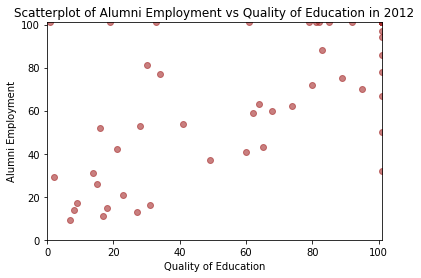

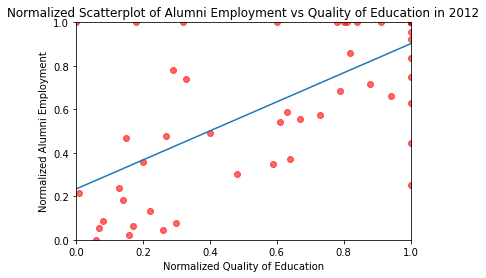

Correlation coefficient (2012): 

[[1.         0.68370307]
 [0.68370307 1.        ]]


In [ ]:
# Plot bar graph and scatterplot
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extract the 2 columns of interest
# Legend - QOE (Quality of Education), AE (Alumni Employment)
fields = ['quality_of_education', 'alumni_employment']
cwur2012 = pd.read_csv('2012US.csv', skipinitialspace = True, usecols = fields)
x = cwur2012.quality_of_education
y = cwur2012.alumni_employment 

# scatterplot of quality of education vs alumni employment in 2012 (USA)
plt.scatter(x, y, color = 'brown', alpha = 0.6)
plt.xlim(0,101)
plt.ylim(0,101)
plt.ylabel('Alumni Employment')
plt.xlabel('Quality of Education')
plt.title('Scatterplot of Alumni Employment vs Quality of Education in 2012')
plt.show()

# normalized scatterplot of quality of education vs alumni employment in 2012 (USA)
normalizedCWUR12 = ((cwur2012 - cwur2012.min()) / (cwur2012.max() - cwur2012.min()))
x1 = normalizedCWUR12.quality_of_education
y1 = normalizedCWUR12.alumni_employment
scaler = MinMaxScaler(feature_range = (0,1)) 
scaledData = (scaler.fit(normalizedCWUR12))
scaledData2 = (scaler.transform(normalizedCWUR12))

plt.scatter(x1, y1, color = 'red', alpha = 0.6)
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)))
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('Normalized Alumni Employment')
plt.xlabel('Normalized Quality of Education')
plt.title('Normalized Scatterplot of Alumni Employment vs Quality of Education in 2012')
plt.show()
print("Correlation coefficient (2012): \n")
print(np.corrcoef(x1,y1)) # prints out correlation coefficient


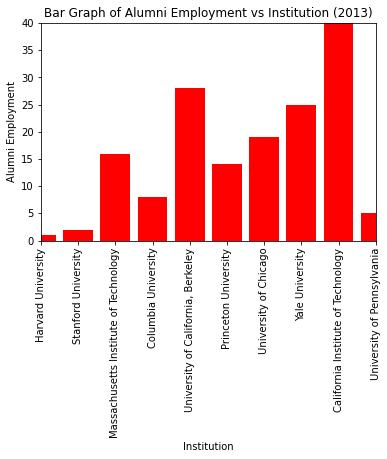

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Plot bar graph for 2013 data (i.e. QOE vs school and Alumni Employment vs School)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# extract the 2 columns of interest
# Legend - ITN (institution), AE (Alumni Employment)
fields = ['institution', 'alumni_employment']
cwur2013 = pd.read_csv('2013US.csv', skipinitialspace = True, usecols = fields)
x = cwur2013.institution
y = cwur2013.alumni_employment 

# bar graph of alumni employment vs institution
# limited to only 10 of them so we can see clearer graph
plt.bar(x, y, color = 'red', linewidth = 0.2)
plt.xlim(0,9)
plt.ylim(0,40)
plt.ylabel('Alumni Employment')
plt.xlabel('Institution')
plt.xticks(rotation = 90)
plt.title('Bar Graph of Alumni Employment vs Institution (2013)')
plt.figure(figsize = (20,20))
plt.show()

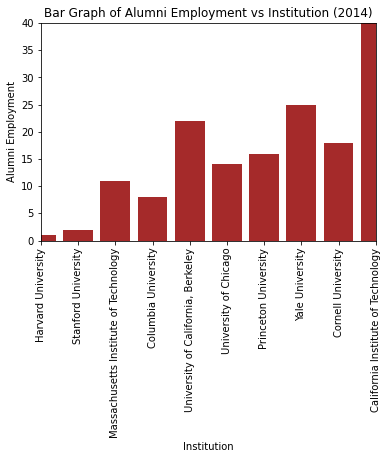

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Histogram of 2014 data (i.e. QOE vs ITN)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# extract the 2 columns of interest
# Legend - ITN (institution), AE (Alumni Employment)
fields = ['institution', 'alumni_employment']
cwur2014 = pd.read_csv('2014US.csv', skipinitialspace = True, usecols = fields)
x = cwur2014.institution
y = cwur2014.alumni_employment

# bar graph of alumni employment vs institution
# limited to only 10 of them so we can see clearer graph
plt.bar(x, y, color = 'brown', linewidth = 0.2)
plt.xlim(0,9)
plt.ylim(0,40)
plt.ylabel('Alumni Employment')
plt.xlabel('Institution')
plt.xticks(rotation = 90)
plt.title('Bar Graph of Alumni Employment vs Institution (2014)')
plt.figure(figsize = (20,20))
plt.show()

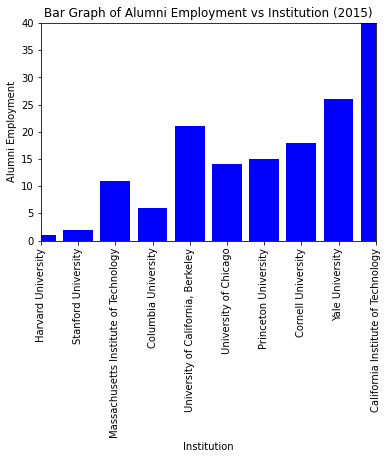

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# extract the 2 columns of interest
# Legend - ITN (institution), AE (Alumni Employment)
fields = ['institution', 'alumni_employment']
cwur2015 = pd.read_csv('2015US.csv', skipinitialspace = True, usecols = fields)
x = cwur2015.institution
y = cwur2015.alumni_employment

# bar graph of alumni employment vs institution
# limited to only 50 of them so we can see clearer graph
plt.bar(x, y, color = 'blue', linewidth = 0.2)
plt.xlim(0,9)
plt.ylim(0,40)
plt.ylabel('Alumni Employment')
plt.xlabel('Institution')
plt.xticks(rotation = 90)
plt.title('Bar Graph of Alumni Employment vs Institution (2015)')
plt.figure(figsize = (20,20))
plt.show()

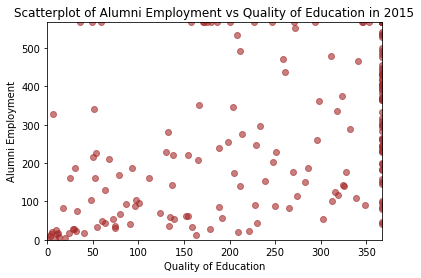

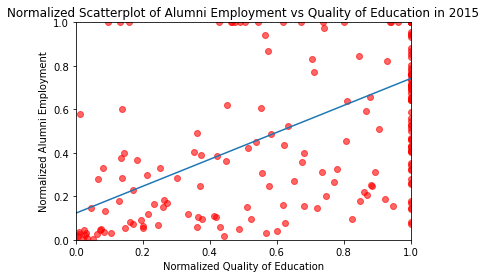

Correlation coefficient (2015): 

[[1.         0.58789768]
 [0.58789768 1.        ]]


In [ ]:
# Plot scatterplot for 2015 data (to compare with 2012 data)
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extract the 2 columns of interest
# Legend - QOE (Quality of Education), AE (Alumni Employment)
fields = ['quality_of_education', 'alumni_employment']
cwur2015 = pd.read_csv('2015US.csv', skipinitialspace = True, usecols = fields)
x = cwur2015.quality_of_education
y = cwur2015.alumni_employment 

# scatterplot of quality of education vs alumni employment in 2012 (USA)
plt.scatter(x, y, color = 'brown', alpha = 0.6)
plt.xlim(0,367)
plt.ylim(0,567)
plt.ylabel('Alumni Employment')
plt.xlabel('Quality of Education')
plt.title('Scatterplot of Alumni Employment vs Quality of Education in 2015')
plt.show()

# normalized scatterplot of quality of education vs alumni employment in 2015 (USA)
normalizedCWUR15 = ((cwur2015 - cwur2015.min()) / (cwur2015.max() - cwur2015.min()))
x2 = normalizedCWUR15.quality_of_education
y2 = normalizedCWUR15.alumni_employment
scaler = MinMaxScaler(feature_range = (0,1))
scaledData = (scaler.fit(normalizedCWUR15))
scaledData2 = (scaler.transform(normalizedCWUR15))

plt.scatter(x2, y2, color = 'red', alpha = 0.6)
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)))
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('Normalized Alumni Employment')
plt.xlabel('Normalized Quality of Education')
plt.title('Normalized Scatterplot of Alumni Employment vs Quality of Education in 2015')
plt.show()
print("Correlation coefficient (2015): \n")
print(np.corrcoef(x2,y2)) # prints out correlation coefficient


Linear Regression Model for Alumni Employment vs Quality of Education (2016)
slope (95%): 0.957447 +/- 0.000000
intercept (95%): 69.355232


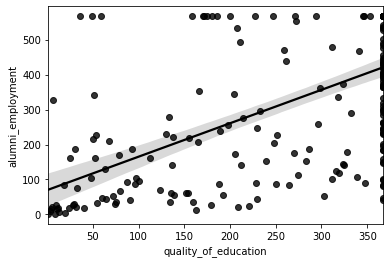

In [ ]:
# Step 4 of Data Science life cycle model: Model part
# I am going to use a simple Machine Learning model 
# and use 2015US.csv data to predict 2016
# correlation between alumni employment
# and quality of education

# Use Linear Regression model here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Use 2015 data and predict what would happen in 2016
fields = ['quality_of_education', 'alumni_employment']
cwur2015 = pd.read_csv('2015US.csv', skipinitialspace = True, usecols = fields)
x = cwur2015.quality_of_education
y = cwur2015.alumni_employment

p = sns.regplot(x = 'quality_of_education', y = 'alumni_employment', 
               data = cwur2015, color = 'black')
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
res = stats.linregress(x, y)

print('Linear Regression Model for Alumni Employment vs Quality of Education (2016)')

# R^2 = residual sum of squares error (how good of a fit the model is)
#print(f"R-squared: {res.rvalue**2:.6f}") # Looks like regression perfectly fits the data - which doesn't seem the case

# Calculate 95% confidence interval on slope and intercept
# Performing a two-sided inverse Student's t-distribution
# p: probability, df: degrees of freedom
from scipy.stats import t
from sklearn import metrics
tinv = lambda p, df:abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}") # print slope and its error of measurement
print(f"intercept (95%): {res.intercept:.6f}") # print intercept and its error of measurement

Linear Regression Model for Alumni Employment vs National Rank of Universities (2016)
slope (95%): 1.812124 +/- 0.000000
intercept (95%): 111.151574


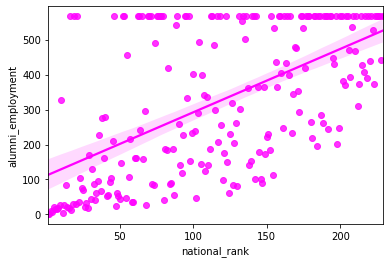

In [ ]:
# I am going to use a simple Machine Learning model 
# and use 2015US.csv data to predict 2016
# correlation between alumni employment
# and national rank (universities)

# Use Linear Regression model here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Use 2015 data and predict what would happen in 2016
fields = ['national_rank', 'alumni_employment']
cwur2015 = pd.read_csv('2015US.csv', skipinitialspace = True, usecols = fields)
x = cwur2015.national_rank
y = cwur2015.alumni_employment

p = sns.regplot(x = 'national_rank', y = 'alumni_employment', 
               data = cwur2015, color = 'magenta')
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
res = stats.linregress(x, y)

print('Linear Regression Model for Alumni Employment vs National Rank of Universities (2016)')

# Print out coefficient of determination (R^2 error)
# R^2 = residual sum of squares error (how good of a fit the model is)
#print(f"R-squared: {res.rvalue**2:.6f}") # Looks like regression perfectly fits the data - which doesn't seem the case

# Calculate 95% confidence interval on slope and intercept
# Performing a two-sided inverse Student's t-distribution
# p: probability, df: degrees of freedom
from scipy.stats import t
tinv = lambda p, df:abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}") # print slope and its error of measurement
print(f"intercept (95%): {res.intercept:.6f}") # print intercept and its error of measurement

Linear Regression Model for Score vs Quality of Education (2016)
slope (95%): -0.057928 +/- 0.000000
intercept (95%): 65.247344


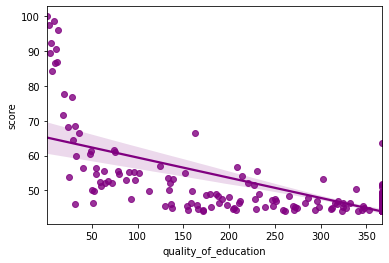

In [ ]:
# I am going to use a simple Machine Learning model 
# and use 2015US.csv data to predict 2016
# correlation between score
# and quality of education

# Use Linear Regression model here
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Use 2015 data and predict what would happen in 2016
fields = ['quality_of_education', 'score']
cwur2015 = pd.read_csv('2015US.csv', skipinitialspace = True, usecols = fields)
x = cwur2015.quality_of_education
y = cwur2015.score

p = sns.regplot(x = 'quality_of_education', y = 'score', 
               data = cwur2015, color = 'purple')
x = p.get_lines()[0].get_xdata()
y = p.get_lines()[0].get_ydata()
res = stats.linregress(x, y)

print('Linear Regression Model for Score vs Quality of Education (2016)')

# Print out coefficient of determination (R^2 error)
# R^2 = residual sum of squares error (how good of a fit the model is)
#print(f"R-squared: {res.rvalue**2:.6f}") # Looks like regression perfectly fits the data - which doesn't seem the case

# Calculate 95% confidence interval on slope and intercept
# Performing a two-sided inverse Student's t-distribution
# p: probability, df: degrees of freedom
from scipy.stats import t
tinv = lambda p, df:abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}") # print slope and its error of measurement
print(f"intercept (95%): {res.intercept:.6f}") # print intercept and its error of measurement

In [ ]:
# Step 5 of Data Science life cycle model: Interpret part
# Here I will make meaningful predictions based on the graphs plotted above

# Based on Linear Regression models plotted above,
# it looks like there is a direct relationship (which implies positive
# correlation) between alumni employment and quality of education, as well
# as alumni employment and national rank. However, there is an inverse relationship 
# (which implies negative correlation) between score of universities and quality
# of education. 

# I agree with the observations written above. With a higher quality of education
# offered at the elite universities, it comes as no surprise that those institutions
# contain some of the brightest students, and it comes with a higher payoff.
# However, there are certain limitations that we're forced to make. Examples of
# that include assuming that students work hard on their classes and earn decent
# grades, make use of all career and networking opportunities, which eventually
# leads to higher rates of alumni employment by elite companies, for which the models
# do not take into account. Likewise for national rank too. Being at a highly-ranked
# national school does not necessarily guarantee greater chances of employment.

# With alumni employment and quality of education (2012 vs 2015 datasets), the
# normalized scatterplots displaying the correlation coefficients dropped from 
# 0.68 to 0.58 during 2012 and 2015 respectively. This implies that there is a 
# positive correlation between the two variables. However, I think the reason
# why the coefficients drop is because employers are giving less importance
# to the educational quality (which is inherently linked to institutions) and
# perhaps focusing more on other factors that affect employment of recent
# college graduates.

# For scores of universites, the data is ranked from the highest ranked university
# to the middle-tier universities, but that does not necessarily mean that the quality
# of education is impeded. Because all entries in that dataset have to be based 
# upon a reference from Harvard University, a downward trend is shown and as a result
# the slope, y-intercept, and correlations are all negative. However, that does not
# say anything bad about the quality of education. 
